# Starbucks Capstone Challenge

### Table of content 

1- [Project Definition](#Definition)<br>
1.1- [Project Overview](#Overview)<br>
1.2- [Problem Statement](#Statement)<br> 
1.3- [Metrics](#Metrics)<br>
2- [Exploratory Data Analysis](#EDA)<br>
2.1- [Data Exploration and Visualization:](#Exploration)<br> 
2.1.A- [Portfolio Dataset](#Portfolio1)<br>
2.1.B- [Profile Dataset](#Profile1)<br> 
2.1.C- [Transcript Dataset](#Transcript1)<br> 
2.2- [Data Analysis](#Anaysis1)<br> 
3- [Data Preprocessing (Wrangling/Cleaning):](#Preprocessing)<br>
3.A- [Portfolio Dataset](#Portfolio2)<br>
3.B- [Profile Dataset](#Profile2)<br>
3.C-[Transcript Dataset](#Transcript2)<br>
4- [Data Modeling:](#Modeling)<br>
4.1- [Modeling](#Modeling)<br>
4.2- [Model Evaluation](#Evaluation)<br>
4.3- [Model Refinement](#Refinement)<br>
5- [Conclusion](#Conclusion)<br>
6- [Reflection](#Reflection)<br>
7- [Improvement](#Improvement)<br>

<a id='Definition'></a>
# 1) Project Definition
<a id='Overview'></a>
## 1.1) Project Overview
###  1.1.1) Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

####  Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

#### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

#### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

### 1.1.2) Project's Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

<a id='Statement'></a>
## 1.2) Problem Statement
The goal of this project is to **Build a model that predicts how will the customer respond will to an offer.**  

**The starategy for solving this problem is as follows:**

- Exploring and Visualizaing the Data.
- Applying Quick Data Analysis.
- Preprocessing the data.
- Scaling the numerical features.
- Trying several Supervised Learning Models.
- Evaluating the models using the chosen metric (Accuracy)- Choosing the best model among them. 
- If the results need to be improved, implementing **GridSearchCV** to find the best parameters (in order to improve the performance of the chosen model).

<a id='Metrics'></a>
## 1.3) Metrics

In order to evaluate our models performance , **we will use accuracy.** This Metric was chosen for the following resons : 
- Since we have  a simple classiifcation problem, i.e. either : 
    - offer viewed.
    - offer completed. 
- It enables us to recognize HOW WELL our model is predicting by comparing the number of correct predictions witht the total number of predictions ( the concept of accuracy).

<a id='EDA'></a>
# 2) Exploratory Data Analysis

### Importing Libraries and Loading Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import json
import datetime
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

<a id='Exploration'></a>
### 2.1) Data Exploration and Visualization:
<a id='Portfolio1'></a>
#### A- Portfolio Dataset

In [3]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [4]:
# checking the columns' titles and datatypes 
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [5]:
# checking the number of rows and columns of the dataset
portfolio.shape

(10, 6)

In [6]:
# checking for the existence of missing values(NaNs)
portfolio.isna().sum()

channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

In [7]:
# checking the offer types the customer can receive
portfolio['offer_type'].unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [8]:
# checking for duplicates
portfolio.columns.duplicated().sum()

0

In [9]:
# checking the number of unique offers
portfolio['id'].nunique()

10

In [10]:
# grouping the offers by their type 
portfolio.groupby('offer_type')['id'].count()

offer_type
bogo             4
discount         4
informational    2
Name: id, dtype: int64

##### The above Exploration for the Portfolio Dataset shows the following: 
- The dataset has 6 columns and 10 rows.
- This dataset has no null values nor duplicates.
- There are three types of offers : 'bogo'(Buy One Get One free), 'informational' and 'discount'.
- There are 4 offers included in the dataset that are classified as : “bogo“ , 4 offers classified as : ”discount” and 2 offers classified as : “informational”.
- The 'difficulty' column unit is dollars , which does not reflect how difficult to be rewarded. Rescaling this feature is a useful step to do. **This needs to be done before Modeling.**

<a id='Profile1'></a>
#### B- Profile Dataset

In [11]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [12]:
# checking the number of rows and columns of the dataset
profile.shape

(17000, 5)

In [13]:
# checking for the existence of missing values(NaNs)
profile.isna().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [14]:
# checking the columns' titles and datatypes 
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [15]:
# checking for duplicates
profile.columns.duplicated().sum()

0

In [16]:
# checking the number unique customers
profile['id'].nunique()

17000

In [17]:
# checking the unique values of difficulty column
uniq_dif_sorted = np.sort(portfolio.difficulty.unique())
uniq_dif_sorted

array([ 0,  5,  7, 10, 20], dtype=int64)

In [18]:
# checking the unique values of the 'gender' column
profile['gender'].unique()

array([None, 'F', 'M', 'O'], dtype=object)

In [19]:
# checking the number of Male and Famale customers 
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

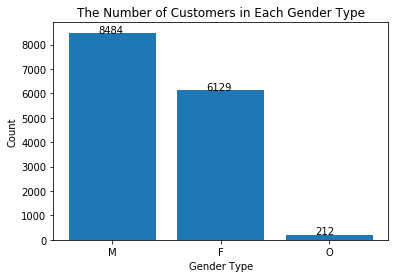

In [20]:
profile_gender_counts = profile.gender.value_counts()
x = ['M','F','O']
data = profile_gender_counts
plt.bar(x,height = data);
xlocs, xlabs = plt.xticks()
for i, v in enumerate(data):
    plt.text(xlocs[i] - 0.13, v , str(v))
plt.xlabel('Gender Type');
plt.ylabel('Count');
plt.title('The Number of Customers in Each Gender Type');

In [21]:
# compute the percentages of the gender distribution
total_counts = profile_gender_counts.sum()
gender_perc = round((profile_gender_counts/ total_counts)*100,2)
gender_perc

M    57.23
F    41.34
O     1.43
Name: gender, dtype: float64

In [22]:
# getting the statitical summary of the 'income' column
profile['income'].describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

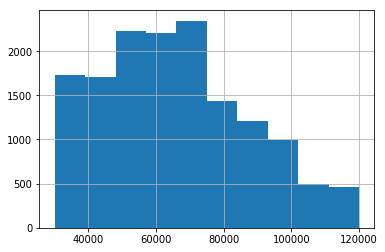

In [23]:
# checking the distribution of 'income' column
profile['income'].hist();

In [24]:
print('1- Number of customers with income = $76,000 is:', profile.age[profile['income']== 76000.0].count())
print('2- Number of customers with income = $75,000 is:', profile.age[profile['income']== 75000.0].count())
print('3- Number of customers with income = $50,000 is:', profile.age[profile['income']== 50000.0].count())
print('4- Number of customers with income = $49,000 is:', profile.age[profile['income']== 49000.0].count())

1- Number of customers with income = $76,000 is: 157
2- Number of customers with income = $75,000 is: 243
3- Number of customers with income = $50,000 is: 253
4- Number of customers with income = $49,000 is: 157


In [25]:
# getting the statitical summary of the 'age' column
profile['age'].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

In [26]:
# checking the unique values in the customers ages sorted in descending order
print(-np.sort(-profile['age'].unique()))

[118 101 100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85
  84  83  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67
  66  65  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49
  48  47  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31
  30  29  28  27  26  25  24  23  22  21  20  19  18]


In [27]:
# get the count of each unique value in the 'age' column and sort that count in an descending order
# this will allow us to identify whether the value is an outlier or not
profile['age'].value_counts().sort_values(ascending=False)

118    2175
58      408
53      372
51      363
54      359
59      359
57      353
52      351
55      350
56      342
63      338
60      333
49      321
62      318
67      317
64      311
61      309
48      288
66      284
50      284
65      280
68      259
70      252
69      242
47      232
45      231
71      230
42      227
43      215
46      212
       ... 
22      131
30      131
29      129
23      126
35      118
81      118
79      117
80      116
31      113
82      105
83      102
84       83
18       70
85       70
87       66
88       64
86       54
89       53
90       52
91       47
92       40
94       33
93       29
95       22
97       13
100      12
96        8
98        5
99        5
101       5
Name: age, Length: 85, dtype: int64

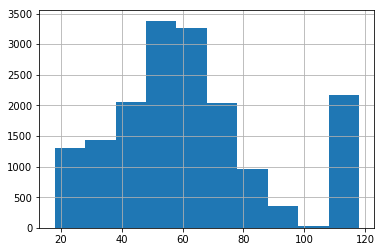

In [28]:
# checking the distribution of 'age' column
profile['age'].hist();

In [29]:
# checking the number of customers that are registered at the age = 118
profile['age'][profile['age'] == 118].count()

2175

In [30]:
# checking the count of values of the rows into which the customers age = 118
profile[profile['age']==118].count()

age                 2175
became_member_on    2175
gender                 0
id                  2175
income                 0
dtype: int64

It is clear that customers with age 118 has no values on both the 'gender' and 'income' columns. To double check this we would do the following:

In [31]:
# creating a dataframe with only the customers with age = 118 
# this data frame will include the coressponding gender and income columns to the customers with age = 118
df_118 = profile[['gender','income','age']][profile['age']==118]

In [32]:
# getting a quick look on the profile data of customers registered at age =118 
print(df_118.head())
print('1-The shape of this dataframe is' ,df_118.shape)
print('2-The number of null values in the "gender" column is:', df_118['gender'].isnull().sum())
print('3-The number of null values in the "income" column is:', df_118['income'].isnull().sum())

  gender  income  age
0   None     NaN  118
2   None     NaN  118
4   None     NaN  118
6   None     NaN  118
7   None     NaN  118
1-The shape of this dataframe is (2175, 3)
2-The number of null values in the "gender" column is: 2175
3-The number of null values in the "income" column is: 2175


##### The above Exploration and Visualization for the Profile Dataset shows the following: 
- The dataset has 5 columns and 17,000 rows.
- The dataset has no duplicated rows.
- The dataset has 2175 missing values on each of:  ‘gender’, ’income’ variables.
- The customers ages range from 18 to 101. Although that 2175  customers were registered at age 118 but I stilI considered this specific age an outlier b/c it appears clearly that there is something wrong related with these 2175 rows in the dataset.
- Exploring and visualizing three variables in this dataset: ‘gender’,’income’ and ’age’, allowed me to get the following conclusion: 
    -	The missing values in 'gender' and ‘income’ variables which are are related solely and specifically with the 2175 customers registered at age 118. In other words, customers at age 118 has no registered ‘gender’ and ‘income’. **This needs to be cleaned in the Data Preprocessing (Wrangling/Cleaning) Section.**
    -	Customers income ranges from 30,000 and 120,000 with most of the customers’ incomes fall between 50,000 and 75,0000.
    -	According to the available data, There are three ‘gender’ categories into which the customers falls in ( M, F and O).  Keeping in our mind the above observation that there are 2175 missing values, Male Customers (8484 men) are more than Female Customers(6129 women) with 57%  of customers are Males compared to 41% Females. However, there are 212 customers chose “O” as their gender.  

<a id='Transcript1'></a>
#### C- Transcript Dataset

In [33]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [34]:
# checking the number of rows and columns of the dataset
transcript.shape

(306534, 4)

In [35]:
# checking for duplicates
transcript.columns.duplicated().sum()

0

In [36]:
# checking the columns' titles and datatypes 
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [37]:
# checking for the existence of missing values(NaNs)
transcript.isna().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [38]:
# getting the types of events of the transcripts 
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [39]:
# checking the count of each event type
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [40]:
# creating a dataframe to include ONLY the 'transaction' event
df_transaction = transcript[transcript['event'] == 'transaction']

In [41]:
#getting a random sample of 'value' column
df_transaction['value'].sample(100)

105734                  {'amount': 0.21}
38409                  {'amount': 12.39}
200439                  {'amount': 2.04}
284268                 {'amount': 15.46}
257984                  {'amount': 4.51}
296618                  {'amount': 29.8}
265187                  {'amount': 0.23}
265393                  {'amount': 3.04}
88114                   {'amount': 2.91}
43840                   {'amount': 3.91}
192711                 {'amount': 19.48}
84008                   {'amount': 28.0}
198577                 {'amount': 25.75}
178246                 {'amount': 19.82}
77048                   {'amount': 17.4}
272613                  {'amount': 2.54}
227873                  {'amount': 4.46}
270499                   {'amount': 0.1}
106485                  {'amount': 5.46}
220423                 {'amount': 10.45}
74197                    {'amount': 1.2}
96537                   {'amount': 5.39}
179880                  {'amount': 0.45}
82483     {'amount': 5.8100000000000005}
85059           

##### The above Exploration for the Transcript Dataset shows the following: 
- The dataset has 4 columns and 306,534 rows.
- The dataset has no duplicated rows nor missing values.
- The ‘value’ column is a dictionary in which we can apply some kind of Feature Engineering to extract useful data that would surely contribute in the success of our future model. **This step will be done through the Data Preprocessing (Wrangling/Cleaning) Section.**
- There are four types of events in this dataset:  ‘transaction’, ’ offer received’, ‘offer viewed’ and ‘offer completed’.
- All the events that are classified as ‘transaction’ do not have an ‘offerid’ within its ‘value’ column.

<a id='Anaysis1'></a>
### 2.3) Data Analysis

This step will be posponed and performed after the Preprocessing and Merging steps. This is done since I believe that analyzing the master clean dataset will provide us with more accurate and reliable results.

**A Quick Data Analysis on the Master Dataset can be found** [Here](#Anaysis2)<br> 

<a id='Preprocessing'></a>
## 3) Data Preprocessing (Wrangling/Cleaning):

<a id='Portfolio2'></a>
### A- Portfolio Dataset

##### To preprocess this dataset we will do the following:
- Rename 'id' column to 'offer_id'.
- Change the unit of 'duration' column from days to hours.
- Rename 'duration' column to 'duration_h' representing that the unit of measurment is 'hours'
- Normalize 'difficulty'  and 'reward' features using the MinMaxScaler.
- Create dummy variables from the 'channels' column using one-hot encoding then Drop the 'channels' column.
- Replace the 'offer_id' by more easy ids.
- Replace the 'offer_type' by integers representing each offer type as follow:
    - 1 : bogo
    - 2 : discount
    - 3 : informational

In [3]:
# creating a copy from the dataset to be cleaned
clean_portfolio = portfolio.copy()

In [4]:
# renaming 'id' column to offer_id.
clean_portfolio.rename(columns={'id':'offer_id'},inplace=True)

**Preprocessing 'duration' Feature**

In [5]:
# changing the unit of 'duration' column from days to hours
clean_portfolio['duration'] = clean_portfolio['duration']*24

In [6]:
# renaming 'duration' column to 'duration_h' representing that the unit of measurment is 'hours'
clean_portfolio.rename(columns={'duration':'duration_h'},inplace=True)

**Preprocessing 'difficulty'  and 'reward' Features**

Normalizing 'difficulty'  and 'reward' features using the MinMaxScaler.

In [7]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['difficulty','reward']

#features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
clean_portfolio[numerical] = scaler.fit_transform(clean_portfolio[numerical])

# Show an example of a record with scaling applied
clean_portfolio.head()

C:\Users\najla\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,channels,difficulty,duration_h,offer_id,offer_type,reward
0,"[email, mobile, social]",0.50,168,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1.0
1,"[web, email, mobile, social]",0.50,120,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,1.0
2,"[web, email, mobile]",0.00,96,3f207df678b143eea3cee63160fa8bed,informational,0.0
3,"[web, email, mobile]",0.25,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,0.5
4,"[web, email]",1.00,240,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,0.5


**Preprocessing 'channels' Feature**

Create dummy variables from 'channels'  column using one-hot encoding

In [8]:
# checking the channels options to decide on the number and the titles of the dummy variables to be created
clean_portfolio['channels'].head(10)

0         [email, mobile, social]
1    [web, email, mobile, social]
2            [web, email, mobile]
3            [web, email, mobile]
4                    [web, email]
5    [web, email, mobile, social]
6    [web, email, mobile, social]
7         [email, mobile, social]
8    [web, email, mobile, social]
9            [web, email, mobile]
Name: channels, dtype: object

In [9]:
# creating dummy variables from the 'channels' column 
clean_portfolio['channel_email'] = clean_portfolio['channels'].apply(lambda x: 1 if 'email' in x else 0)
clean_portfolio['channel_mobile'] = clean_portfolio['channels'].apply(lambda x: 1 if 'mobile' in x else 0)
clean_portfolio['channel_social'] = clean_portfolio['channels'].apply(lambda x: 1 if 'social' in x else 0)
clean_portfolio['channel_web'] = clean_portfolio['channels'].apply(lambda x: 1 if 'web' in x else 0)

In [10]:
# checking that the dummy variables are correctly created 
clean_portfolio[['channels','channel_email','channel_mobile','channel_web','channel_social']].sample(5)

,channels,channel_email,channel_mobile,channel_web,channel_social
0,"[email, mobile, social]",1,1,0,1
6,"[web, email, mobile, social]",1,1,1,1
4,"[web, email]",1,0,1,0
7,"[email, mobile, social]",1,1,0,1
1,"[web, email, mobile, social]",1,1,1,1


In [11]:
# dropping the 'channels' column
clean_portfolio.drop('channels', axis=1, inplace=True)

In [12]:
clean_portfolio.head()

,difficulty,duration_h,offer_id,offer_type,reward,channel_email,channel_mobile,channel_social,channel_web
0,0.50,168,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1.0,1,1,1,0
1,0.50,120,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,1.0,1,1,1,1
2,0.00,96,3f207df678b143eea3cee63160fa8bed,informational,0.0,1,1,0,1
3,0.25,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,0.5,1,1,0,1
4,1.00,240,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,0.5,1,0,0,1


**Preprocessing 'offer_id' Feature** <a id='offerid'></a>

In [13]:
# replacing the 'offer_id' by more easy ids
labels_offer_id = clean_portfolio['offer_id'].astype('category').cat.categories.tolist()
replace_map_comp_offer_id = {'offer_id' : {k: v for k,v in zip(labels_offer_id,list(range(1,len(labels_offer_id)+1)))}}

In [14]:
# checking the new offer ids labels 
replace_map_comp_offer_id

{'offer_id': {'0b1e1539f2cc45b7b9fa7c272da2e1d7': 1,
  '2298d6c36e964ae4a3e7e9706d1fb8c2': 2,
  '2906b810c7d4411798c6938adc9daaa5': 3,
  '3f207df678b143eea3cee63160fa8bed': 4,
  '4d5c57ea9a6940dd891ad53e9dbe8da0': 5,
  '5a8bc65990b245e5a138643cd4eb9837': 6,
  '9b98b8c7a33c4b65b9aebfe6a799e6d9': 7,
  'ae264e3637204a6fb9bb56bc8210ddfd': 8,
  'f19421c1d4aa40978ebb69ca19b0e20d': 9,
  'fafdcd668e3743c1bb461111dcafc2a4': 10}}

In [15]:
# replacing the categorical values in the 'offer_id' column by numberical values
clean_portfolio.replace(replace_map_comp_offer_id, inplace=True)

**Preprocessing 'offer_type' Feature**

In [16]:
# replacing the 'offer_type' by integers representing each offer type
labels_offer_type = clean_portfolio['offer_type'].astype('category').cat.categories.tolist()
replace_map_comp_offer_type = {'offer_type' : {k: v for k,v in zip(labels_offer_type,list(range(1,len(labels_offer_type)+1)))}}

In [17]:
# checking the new offer types labels
print(replace_map_comp_offer_type)

{'offer_type': {'bogo': 1, 'discount': 2, 'informational': 3}}


In [18]:
# replacing the categorical values in the 'offer_type' column by numberical values
clean_portfolio.replace(replace_map_comp_offer_type, inplace=True)

In [19]:
# confirming changes
print(clean_portfolio.columns)
clean_portfolio.info()

Index(['difficulty', 'duration_h', 'offer_id', 'offer_type', 'reward',
       'channel_email', 'channel_mobile', 'channel_social', 'channel_web'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
difficulty        10 non-null float64
duration_h        10 non-null int64
offer_id          10 non-null int64
offer_type        10 non-null int64
reward            10 non-null float64
channel_email     10 non-null int64
channel_mobile    10 non-null int64
channel_social    10 non-null int64
channel_web       10 non-null int64
dtypes: float64(2), int64(7)
memory usage: 800.0 bytes


<a id='Profile2'></a>
### B- Profile Dataset

##### To preprocess this dataset we will do the following:
- Preprocessing 'id' Feature:
    - Rename 'id' column name to 'customer_id'.
    - Re-arrange the columns to have 'customer_id' column the first column in dataset.
    - Replace the customer_id string values  with easiest numerical values.
    
- Preprocessing 'age' Feature:
    - Replace age = 118 by NaN value.
    - Remove customers (drop rows) with no 'age', 'gender' and 'income'.
    - Change the datatype of 'age' and 'income' columns to 'int'.
    - Create a new column 'age_group' that includes the age_group to which each customer belongs
    - Replace the 'age_group' categorical label by a corresponding numerical label, as follows: 
        - 1 : teenager
        - 2 : young-adult
        - 3 : adult
        - 4 : elderly
        
- Preprocessing 'income' Feature:
    - Create a new column 'income_range' that includes the income-range to which the customer's income belongs.
    - Replace the 'income_range' categorical label by a corresponding numerical label, as follows: 
        - 1 : average (30,000 - 60,000)
        - 2 : above-average (60,0001 - 90,000)
        - 3 : high (more than 90,000)

- Preprocessing 'gender' Feature:
    - Replace the 'gender' categorical labels with coressponding numerical label, as follows:
        - 1 : F (Female)
        - 2 : M (Male)
        - 3 : O

- Preprocessing 'became_member_on' Feature:
    - Change the datatype of 'became_member_on' column from int to date and put it in the appropriate format in order to have a readable date format  that can be analyzed easily if requiered.
    - Add a new column 'start_year', that will present the year at which the customer become a member, to the existing dataset (for further analysis).
    - Add a new column 'membership_days' ,that will present the number of days since the customer became a member, to the existing dataset (for further analysis).
    - Create a new column 'member_type' representing the type of the member: new, regular or loyal depending on the number of his 'membership_days'.
    - Replace the 'member_type' categorical label by a corresponding numerical label, as follows: 
        - 1 : new (memebr since 1000 days or less)
        - 2 : regular (1001 - 1,600 days of membership)
        - 3 : loyal (more than 1,600 days of membership)

- Drop 'age','income', 'became_member_on' and 'membership_days' columns, since they are no longer needed.

In [195]:
# creating a copy from the dataset to be cleaned
clean_profile = profile.copy()

**Preprocessing 'id' Feature** <a id='customerid'></a>

In [196]:
# renaming 'id' column name to 'customer_id'.
clean_profile.rename(columns={'id':'customer_id'},inplace=True)

In [197]:
# checking the existing columns' order
clean_profile.columns

Index(['age', 'became_member_on', 'gender', 'customer_id', 'income'], dtype='object')

In [198]:
# Re-arranging the columns to have 'customer_id' column the first column in dataset
clean_profile = clean_profile.reindex(columns=['customer_id', 'age', 'became_member_on', 'gender', 'income'])

In [199]:
# confirming changes in columns order
clean_profile.columns

Index(['customer_id', 'age', 'became_member_on', 'gender', 'income'], dtype='object')

In [200]:
# replacing the 'customer_id' string values  with easiest numerical values
labels_customer_id = clean_profile['customer_id'].astype('category').cat.categories.tolist()
replace_map_comp_customer_id = {'customer_id' : {k: v for k,v in zip(labels_customer_id,list(range(1,len(labels_customer_id)+1)))}}

In [201]:
# replacing the  categorical labels in 'customer_id' column with numerical labels
clean_profile.replace(replace_map_comp_customer_id, inplace=True)

**Preprocessing 'age' Feature**

In [202]:
# replacing the age = 118 by NaN value
clean_profile['age'] = clean_profile['age'].apply(lambda x: np.nan if x == 118 else x)

In [203]:
# checking that the age = 118 does not longer exist, the output should be nothing 
clean_profile[clean_profile['age'] == 118] 

,customer_id,age,became_member_on,gender,income


In [204]:
# dropping rows with NaNs in 'age', 'gender' and 'income' columns
clean_profile.dropna(inplace=True)

In [205]:
# checking that the rows with missing values(NaNs) have been successfully dropped
clean_profile.isna().sum()

customer_id         0
age                 0
became_member_on    0
gender              0
income              0
dtype: int64

In [206]:
# changing the datatype of 'age' and 'income' columns to 'int'
clean_profile[['age','income']] = clean_profile[['age','income']].astype(int)

In [207]:
# creating a new column representing the age group to which the customer belongs 
clean_profile['age_group'] = pd.cut(clean_profile['age'], bins=[17, 22, 35, 60, 103],labels=['teenager', 'young-adult', 'adult', 'elderly'])

In [208]:
# checking the unique values in the newely created column
clean_profile['age_group'].head(10)

1           adult
3         elderly
5         elderly
8         elderly
12          adult
13        elderly
14    young-adult
15        elderly
16          adult
18          adult
Name: age_group, dtype: category
Categories (4, object): [teenager < young-adult < adult < elderly]

In [209]:
# replacing the 'age_group' categorical labels by numerical labels
labels_age_group = clean_profile['age_group'].astype('category').cat.categories.tolist()
replace_map_comp_age_group = {'age_group' : {k: v for k,v in zip(labels_age_group,list(range(1,len(labels_age_group)+1)))}}

In [210]:
print(replace_map_comp_age_group)

{'age_group': {'teenager': 1, 'young-adult': 2, 'adult': 3, 'elderly': 4}}


In [211]:
# replace categorical labels in 'age_group' column with numerical labels
clean_profile.replace(replace_map_comp_age_group, inplace=True)

In [212]:
# confirming that the replacement has been correctly performed 
clean_profile['age_group'].head(10)

1     3
3     4
5     4
8     4
12    3
13    4
14    2
15    4
16    3
18    3
Name: age_group, dtype: int64

**Preprocessing 'income' Feature**

In [213]:
# creating a new column representing the age group to which the customer belongs 
clean_profile['income_range'] = pd.cut(clean_profile['income'], bins=[29999, 60000, 90000, 120001],labels=['average', 'above-average', 'high'])

In [214]:
# replacing the 'income_range' categorical labels by numerical labels
labels_income_range = clean_profile['income_range'].astype('category').cat.categories.tolist()
replace_map_comp_income_range = {'income_range' : {k: v for k,v in zip(labels_income_range,list(range(1,len(labels_income_range)+1)))}}

In [215]:
# checking the categorical labels and its corresponding numerical labels for 'income_range' column
replace_map_comp_income_range

{'income_range': {'average': 1, 'above-average': 2, 'high': 3}}

In [216]:
# replacing categorical labels in 'income_range' column with numerical labels
clean_profile.replace(replace_map_comp_income_range, inplace=True)

**Preprocessing 'gender' Feature**

In [217]:
# replacing the 'gender' categorical labels with coressponding numerical label
labels_gender = clean_profile['gender'].astype('category').cat.categories.tolist()
replace_map_comp_gender = {'gender' : {k: v for k,v in zip(labels_gender,list(range(1,len(labels_gender)+1)))}}
clean_profile.replace(replace_map_comp_gender, inplace=True)

In [218]:
# checking the numerical label and its corresponding categorical label
print(replace_map_comp_gender)

{'gender': {'F': 1, 'M': 2, 'O': 3}}


**Preprocessing 'membership_days' Feature**

In [219]:
# changing the datatype of 'became_member_on' column from int to date and put it in the appropriate format
clean_profile['became_member_on'] = pd.to_datetime(clean_profile['became_member_on'], format = '%Y%m%d')

In [220]:
# adding a new column 'start_year', that will present the year at which the customer became a member
clean_profile['membership_year'] = clean_profile['became_member_on'].dt.year

In [221]:
# adding a new column 'membership_days' ,that will present the number of days since the customer become a member
clean_profile['membership_days'] = datetime.datetime.today().date() - clean_profile['became_member_on'].dt.date

# removing the 'days' unit
clean_profile['membership_days'] = clean_profile['membership_days'].dt.days

**Preprocessing 'membership_days' Feature**

In [222]:
# creating a new column 'member_type' representing the type of the member: new, regular or loyal depending on the number of his 'membership_days'
clean_profile['member_type'] = pd.cut(clean_profile['membership_days'], bins=[390, 1000, 1600, 2500],labels=['new', 'regular', 'loyal'])

In [223]:
# replacing the 'member_type' categorical labels by numerical labels
labels_member_type = clean_profile['member_type'].astype('category').cat.categories.tolist()
replace_map_comp_member_type = {'member_type' : {k: v for k,v in zip(labels_member_type,list(range(1,len(labels_member_type)+1)))}}

In [224]:
# checking the numerical label and its corresponding categorical label
print(replace_map_comp_member_type)

{'member_type': {'new': 1, 'regular': 2, 'loyal': 3}}


In [225]:
# replacing categorical labels in 'member_type' column with numerical labels
clean_profile.replace(replace_map_comp_member_type, inplace=True)

In [226]:
# dropping 'age','income', 'became_member_on' and 'membership_days' columns, since they are no longer needed.
clean_profile.drop(columns = ['age','income','became_member_on', 'membership_days'], axis=1, inplace=True)

In [227]:
# confirming changes
print(clean_profile.columns)
clean_profile.info()

Index(['customer_id', 'gender', 'age_group', 'income_range', 'membership_year',
       'member_type'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 6 columns):
customer_id        14825 non-null int64
gender             14825 non-null int64
age_group          14825 non-null int64
income_range       14825 non-null int64
membership_year    14825 non-null int64
member_type        14825 non-null int64
dtypes: int64(6)
memory usage: 810.7 KB


In [228]:
# check the first few rows of our preprocessed clean_profile dataset
clean_profile.head()

,customer_id,gender,age_group,income_range,membership_year,member_type
1,399,1,3,3,2017,1
3,7997,1,4,3,2017,1
5,15044,2,4,2,2018,1
8,3729,2,4,1,2018,1
12,3060,2,3,1,2017,1


<a id='Transcript2'></a>
### C- Transcript Dataset

##### To preprocess this dataset we will do the following:
- Rename 'time' column to 'time_h' representing that the unit of measurment is 'hours'.
- Preprocess 'person' Feature:
    - Rename 'person' column to 'customer_id'.
    - Replace the categorical values in 'customer_id' column by the newly initiated numerical values corresponding with each customer id, which resulted from the previous [preprocessing for 'id' feature](#customerid)<br> 

- Preprocess 'value' Feature:
    - Extract each key that exists in the 'value' column to a seperate column than dropping the 'value' column.
    - Fill all the NaNs in the 'offer_id' column with 'N/A' values (i.e. Not Applicable).
    - Drop the 'value' column since it is no longer needed.
       
- Preprocess 'event' Feature:
    - Excluding all events of 'transaction' or 'offer received' from our clean_transcript dataset.
    - Replace the 'event' categorical labels with coressponding numerical label, as follows:
        - 1 : offer completed
        - 2 : offer viewed
        
- Preprocess 'offer_id' Feature:
    - Replace the categorical values in the 'offer_id' column by the corresponding numerical values used initiated during [Preprocessing Portfolio Dataset](#offerid)<br>

In [229]:
# create a copy from the dataset to be cleaned
clean_transcript = transcript.copy()

In [230]:
# renaming 'time' column to 'time_h'
clean_profile.rename(columns={'time':'time_h'},inplace=True)

**Preprocess 'person' Feature:**

In [231]:
# renaming 'person' column to 'customer_id' and 'time' column to 'time_h'
clean_transcript.rename(columns={'person':'customer_id','time':'time_h' },inplace=True)

In [232]:
# replace categorical labels in 'customer_id' column with numerical labels
clean_transcript.replace(replace_map_comp_customer_id, inplace=True)

In [233]:
# checking the first few entries in the 'customer_id' columns
clean_transcript['customer_id'].head()

0     7997
1    10736
2    15044
3     9525
4     6940
Name: customer_id, dtype: int64

The values that have not been replaced are for those customers who did not exist in the Profile Dataset. However, this issue will be automatically solved when we merge the Profile Dataset with the Transcript Dataset using the 'customer_id' column.

**Preprocessing 'value' Feature**

Extract each key that exist in 'value' column to a seperate column.

In [234]:
# getting the different keys  that exists in the 'value' column
keys = []
for idx, row in clean_transcript.iterrows():
    for k in row['value']:
        if k in keys:
            continue
        else:
            keys.append(k)

In [235]:
# checking the different keys of the 'value' dictionary
keys

['offer id', 'amount', 'offer_id', 'reward']

In [236]:
#create columns and specify the datatype of each of them
clean_transcript['offer_id'] = '' # datatype : string
clean_transcript['amount'] = 0  # datatype : integer
clean_transcript['reward'] = 0  # datatype : integer

In [237]:
# Iterating over clean_transcript dataset and checking 'value' column
# then updating it and using the values to fill in the columns created above
for idx, row in clean_transcript.iterrows():
    for k in row['value']:
        if k == 'offer_id' or k == 'offer id': # b/c 'offer_id' and 'offer id' are representing the same thing 
            clean_transcript.at[idx, 'offer_id'] = row['value'][k]
        if k == 'amount':
            clean_transcript.at[idx, 'amount'] = row['value'][k]
        if k == 'reward':
            clean_transcript.at[idx, 'reward'] = row['value'][k]

In [238]:
# filling all the NaNs in the 'offer_id' column with 'N/A' values (i.e. Not Applicable)
clean_transcript['offer_id'] = clean_transcript['offer_id'].apply(lambda x: 'N/A' if x == '' else x)

In [239]:
# dropping the 'value' column 
clean_transcript.drop('value', axis=1, inplace=True)

**Preprocessing 'event' Feature**

In [240]:
# checking the unique values in 'event' column
clean_transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

**Two important points to keep in mind:** 
- Since we are interested in the events related with the offers, i.e offer received, offer viewed, offer completed, we will remove all events of 'transaction' because they are not directly related with offers. 
- we will exclude all the events of 'offer recieved',since I want to focus on whether the customer:
    - Only viewed the offer (offer viewed)
    - viewed the offer and then completed it (offer viewed)&(offer completed).

In [241]:
# excluding all events of 'transaction' from our clean_transcript dataset
clean_transcript = clean_transcript[clean_transcript['event'] != 'transaction']

# excluding all events of 'offer received' 
clean_transcript = clean_transcript[clean_transcript['event'] != 'offer received']

In [242]:
# checking that the events of either 'transaction' or 'offer received'were successfully removed from the dataset
clean_transcript['event'].unique() 

array(['offer viewed', 'offer completed'], dtype=object)

In [243]:
# replacing the 'event' categorical labels with coressponding numerical label
labels_event = clean_transcript['event'].astype('category').cat.categories.tolist()
replace_map_comp_event = {'event' : {k: v for k,v in zip(labels_event,list(range(1,len(labels_event)+1)))}}

In [244]:
# checking the numerical label and its corresponding categorical label
print(replace_map_comp_event)

{'event': {'offer completed': 1, 'offer viewed': 2}}


In [245]:
# replace categorical labels in 'event' column with numerical labels
clean_transcript.replace(replace_map_comp_event, inplace=True)

In [246]:
# checking the current columns' datatypes 
clean_offer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167581 entries, 0 to 306527
Data columns (total 6 columns):
event          167581 non-null int64
customer_id    167581 non-null int64
time_h         167581 non-null int64
offer_id       167581 non-null int64
amount         167581 non-null int64
reward         167581 non-null int64
dtypes: int64(6)
memory usage: 8.9 MB


**Preprocessing 'offer_id' Feature**

In [247]:
# replacing the categorical values in the 'offer_id' column by its corresponding numerical values
clean_transcript.replace(replace_map_comp_offer_id, inplace=True)

In [248]:
# confirming the changes done 
print(clean_transcript.columns)
clean_transcript.head()

Index(['event', 'customer_id', 'time_h', 'offer_id', 'amount', 'reward'], dtype='object')


,event,customer_id,time_h,offer_id,amount,reward
12650,2,3729,0,9,0,0
12651,2,13995,0,6,0,0
12652,2,1052,0,5,0,0
12653,2,170,0,8,0,0
12655,2,12744,0,6,0,0


### Merging the three clean datasets (Portfolio, Profile and Transaction ) into ONE Master Clean Dataset

In [422]:
# merge 'clean_transcript' dataset with 'clean_portfolio' on 'offer_id'
master_df =clean_transcript.merge(clean_portfolio,how='left',on='offer_id')

In [423]:
# join 'master_df' dataset with 'clean_profile' on 'customer_id'
master_df = master_df.merge(clean_profile,how ='left', on = 'customer_id')

In [424]:
# checking our newely created master dataset
master_df.head()

,event,customer_id,time_h,offer_id,amount,reward_x,difficulty,duration_h,offer_type,reward_y,channel_email,channel_mobile,channel_social,channel_web,gender,age_group,income_range,membership_year,member_type
0,2,3729,0,9,0,0,0.25,120,1,0.5,1,1,1,1,2.0,4.0,1.0,2018.0,1.0
1,2,13995,0,6,0,0,0.00,72,3,0.0,1,1,1,0,3.0,3.0,1.0,2017.0,1.0
2,2,1052,0,5,0,0,0.50,120,1,1.0,1,1,1,1,1.0,4.0,1.0,2016.0,2.0
3,2,170,0,8,0,0,0.50,168,1,1.0,1,1,1,0,1.0,1.0,1.0,2016.0,2.0
4,2,12744,0,6,0,0,0.00,72,3,0.0,1,1,1,0,2.0,3.0,1.0,2014.0,3.0


In [425]:
# check if we have any missing values 
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91304 entries, 0 to 91303
Data columns (total 19 columns):
event              91304 non-null int64
customer_id        91304 non-null int64
time_h             91304 non-null int64
offer_id           91304 non-null int64
amount             91304 non-null int64
reward_x           91304 non-null int64
difficulty         91304 non-null float64
duration_h         91304 non-null int64
offer_type         91304 non-null int64
reward_y           91304 non-null float64
channel_email      91304 non-null int64
channel_mobile     91304 non-null int64
channel_social     91304 non-null int64
channel_web        91304 non-null int64
gender             82304 non-null float64
age_group          82304 non-null float64
income_range       82304 non-null float64
membership_year    82304 non-null float64
member_type        82304 non-null float64
dtypes: float64(7), int64(12)
memory usage: 13.9 MB


As we can see, we have missing values in the columns that came from the portfolio dataset( customer demographic data), this means that the some customers hasno demographic data. Those customers will be removed since the customers portfolio data is very important for our model for predicting accurately.

In [426]:
# removing any row that contain NaNs
master_df = master_df.dropna(how='any',axis=0) 

In [427]:
# check if we have any missing values 
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82304 entries, 0 to 91303
Data columns (total 19 columns):
event              82304 non-null int64
customer_id        82304 non-null int64
time_h             82304 non-null int64
offer_id           82304 non-null int64
amount             82304 non-null int64
reward_x           82304 non-null int64
difficulty         82304 non-null float64
duration_h         82304 non-null int64
offer_type         82304 non-null int64
reward_y           82304 non-null float64
channel_email      82304 non-null int64
channel_mobile     82304 non-null int64
channel_social     82304 non-null int64
channel_web        82304 non-null int64
gender             82304 non-null float64
age_group          82304 non-null float64
income_range       82304 non-null float64
membership_year    82304 non-null float64
member_type        82304 non-null float64
dtypes: float64(7), int64(12)
memory usage: 12.6 MB


<a id='Anaysis2'></a>
###  Quick Data Analysis on the Master DataSet

**A Quick data analysis would be performed on the master dataset to answer the following Questions :**

**1-** What is the most common offer each age group( teenagers, young-adults, adults and elderly)?

**2-** Based on the demographic data of the customers who gets the highest income range , males or females?

**3-** Who takes longer time to acheive each offer, Males or Females?

**4-** How many new members Starbucks got each year?

**5-** Which type of promotions(offers) each gender likes?

**6-** What is the average length between two transcript for the same customer?

**7-** From all the offers the customers viewed , how many offers they completed?

**To easily understand the below analysis, Reconvert the values of the following features from numerical values to its original categorical values. The following maping for the features numerical values will be used:**

- Mapping of Numerical values for  ‘age_group’ feature:
    - 1 : teenager
    - 2 : young-adult
    - 3 : adult
    - 4 : elderly
        
        
- Mapping of Numerical values for  ‘income_range’ feature:
    - 1 : average (30,000 - 60,000)
    - 2 : above-average (60,0001 - 90,000)
    - 3 : high (more than 90,000)


- Mapping of Numerical values for  ‘gender’ feature:
    - 1 : F (Female)
    - 2 : M (Male)
    - 3 : O


- Mapping of Numerical values for  'offer_type' feature:
    - 1 : bogo
    - 2 : discount
    - 3 : informational


- Mapping of Numerical values for  ‘event’ feature:
    - 1 : offer completed
    - 2 : offer viewed


In [428]:
# reconverting the values of the following features from numerical values to its original categorical values.
master_df['event'] = master_df['event'].map({1: 'Completed', 2: 'Viewed'})
master_df['offer_type'] = master_df['offer_type'].map({1: 'BOGO', 2: 'Discount', 3: 'Informational'})
master_df['income_range'] = master_df['income_range'].map({1: 'Average', 2: 'Above-Average', 3:'High'})
master_df['age_group'] = master_df['age_group'].map({1: 'teenager', 2: 'young-adult', 3:'adult', 4:'elderly'})

**1- What is the common offer each age group ( teenagers, young-adults, adults and elderly)?**

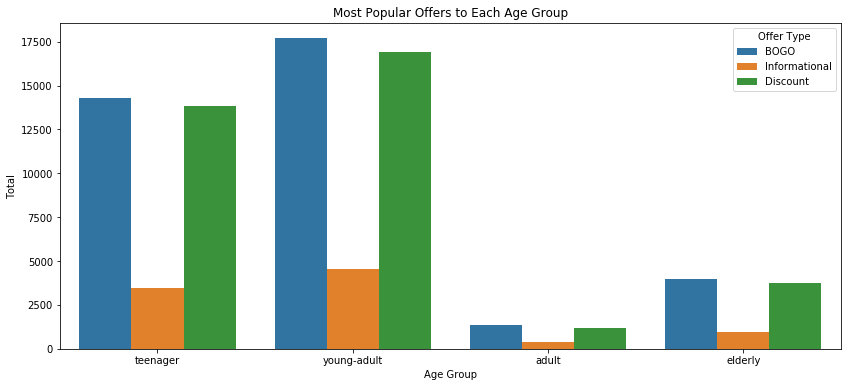

In [429]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x="age_group", hue="offer_type", data=master_df)
plt.title('Most Popular Offers to Each Age Group')
plt.ylabel('Total')
plt.xlabel('Age Group')
xlabels = ['teenager','young-adult','adult','elderly']
g.set_xticklabels(xlabels)
plt.xticks(rotation = 0)
plt.legend(title='Offer Type')
plt.show();

The most common offer type among all age groups is the BOGO , followed by the Discount Offers. Whereas, the least common offer to be sent is the informational offers. I believe that BOGO offers are more attractive compared to other offers provided by Starbucks.

**2- Based on the demographic data of the customers who gets the highest income range , males or females?**

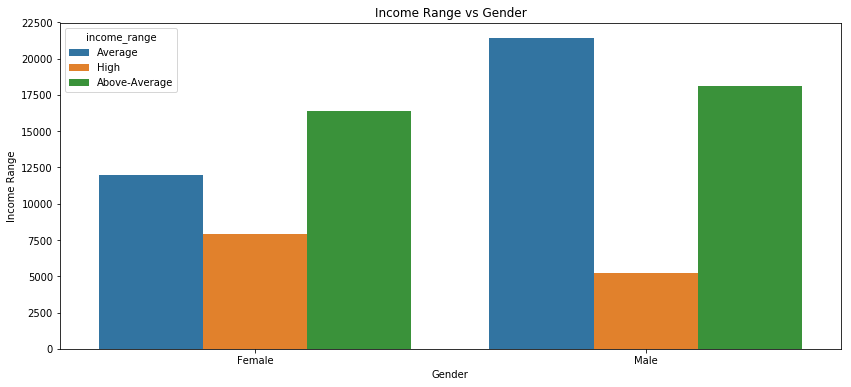

In [431]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x="gender", hue="income_range", data= master_df[master_df["gender"] != 3])
plt.title('Income Range vs Gender')
plt.ylabel('Income Range')
xlabels = ['Female', 'Male']
g.set_xticklabels(xlabels)
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.show();

Customers with High income (Above 90,000) are mostly female customers. Whereas, Average Income(30,000 - 60,000) customers are mostly males.

**3- Who takes longer time to acheive each offer, Males or Females?**

Males and Females are pretty close when it comes to the time spent to complete an offer. Both males and females take about 17 days to da so.

In [432]:
tran_avg_len_g_f = master_df.groupby(['gender', 'offer_id'])['time_h'].mean().reset_index()
tran_avg_len_g_m = master_df.groupby(['gender', 'offer_id'])['time_h'].mean().reset_index()

print(tran_avg_len_g_f[tran_avg_len_g_f['gender'] == 1.]['time_h'].values[0], tran_avg_len_g_f[tran_avg_len_g_f['gender'] == 1.]['time_h'].values[0] / 24)
print(tran_avg_len_g_m[tran_avg_len_g_m['gender'] == 2.]['time_h'].values[0], tran_avg_len_g_m[tran_avg_len_g_m['gender'] == 2.]['time_h'].values[0] / 24)

406.0245810055866 16.917690875232775
405.1082529474812 16.879510539478385


**4- How many new members Starbucks got each year?**

In [433]:
master_df['membership_year'] = master_df['membership_year'].astype(int)

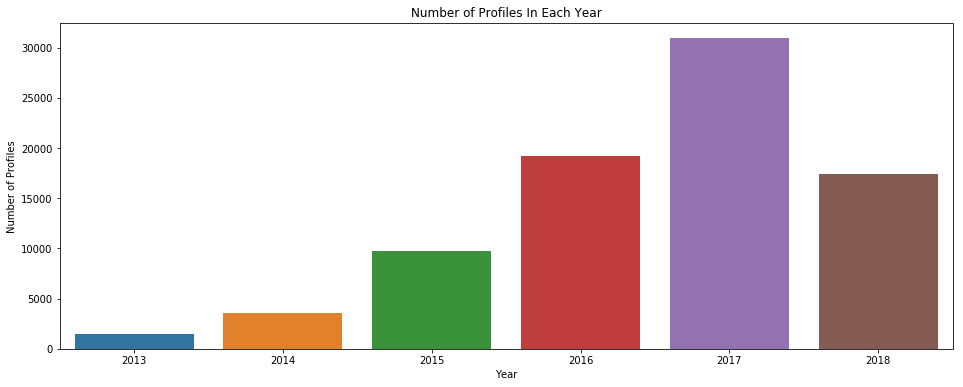

In [434]:
plt.figure(figsize=(16, 6))
sns.countplot(master_df['membership_year'])
plt.title('Number of Profiles In Each Year')
plt.ylabel('Number of Profiles')
plt.xlabel('Year')
plt.xticks()
plt.show();

In [468]:
# getting the number of customers that became members on 2017
members_2017 = (master_df['membership_year']==2017).sum()

# getting the total number of members among all the available years
total = master_df['membership_year'].count()

# getting the percentages of customers that became members on 2017
perc_2017 = round((members_2017/total)*100,2)

print(members_2017)
perc_2017

30938


37.59

2017 was the best year for Starbucks in terms of the number of new members. Around %38 of all the customers on our dataset regiseterd as members on this specific year.

**5- Which type of promotions(offers) each gender likes?**

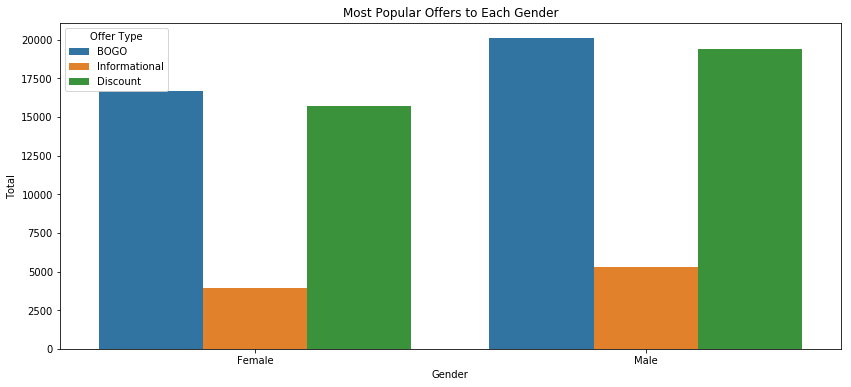

In [435]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='gender', hue="offer_type", data= master_df[master_df["gender"] != 3])
plt.title('Most Popular Offers to Each Gender')
plt.ylabel('Total')
plt.xlabel('Gender')
xlabels = ['Female', 'Male']
g.set_xticklabels(xlabels)
plt.legend(title='Offer Type')
plt.show();

The chart we got showed that both genders like BOGO and Discount offers and they have the same reaction toward Informational offers, they both seem to be not intersted to it.

**6- What is the average length between two transcript for the same customer?**

In [436]:
tran_avg_len = master_df.groupby(['customer_id', 'offer_id'])['time_h'].mean().reset_index()
tran_avg_len['time_h'].mean(), tran_avg_len['time_h'].mean() / 24

(372.2493970513041, 15.510391543804337)

The mean time it takes a customer to complete an offer is less than 16 days (372 hours).

**7- From all the offers the customers viewed , how many offers they completed?**

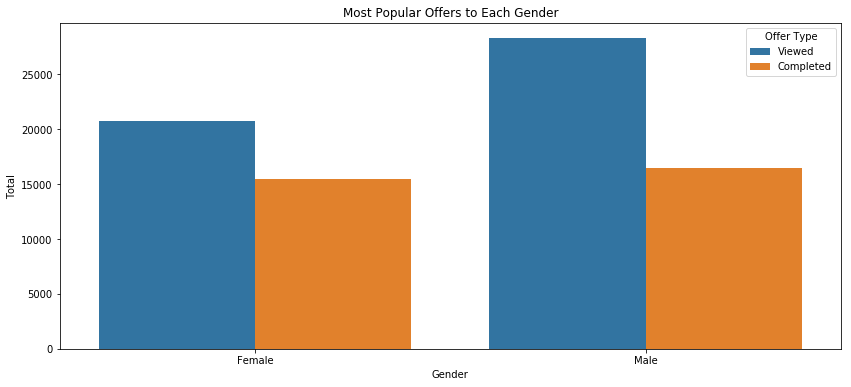

In [437]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='gender', hue="event", data= master_df[master_df["gender"] != 3])
plt.title('Most Popular Offers to Each Gender')
plt.ylabel('Total')
plt.xlabel('Gender')
xlabels = ['Female', 'Male']
g.set_xticklabels(xlabels)
plt.legend(title='Offer Type')
plt.show();

In [448]:
total_trans_g_o = master_df[master_df["gender"] != 3].groupby(['gender','offer_type']).count()
total_trans_g_e = master_df[master_df["gender"] != 3].groupby(['gender','event']).count()
total_trans_go_o_t = total_trans_g_o.loc[(1)]['event'].sum()
total_trans_go_o_tt = total_trans_g_o.loc[(2)]['event'].sum()
total_trans_go_o_t_offers_f = total_trans_g_o.loc[(1)].loc[['BOGO', 'Discount', 'Informational']]['event'].sum()
total_trans_go_o_t_offers_m = total_trans_g_o.loc[(2)].loc[['BOGO', 'Discount', 'Informational']]['event'].sum()

In [451]:
print('For Females:')
print(f"Number of offer completed: {total_trans_g_e.loc[(1, 'Completed')].values[0]}, {round((total_trans_g_e.loc[(1, 'Completed')].values[0]/total_trans_g_e.loc[(1, 'Viewed')].values[0])*100,2)}% of total offers viewed.")
print(f"Number of offer viewed: {total_trans_g_e.loc[(1, 'Viewed')].values[0]}.")

print('\nFor Males:')
print(f"Number of offer completed: {total_trans_g_e.loc[(2, 'Completed')].values[0]}, {round((total_trans_g_e.loc[(2, 'Completed')].values[0]/total_trans_g_e.loc[(2, 'Viewed')].values[0])*100,2)}% of total offers viewed.")
print(f"Number of offer viewed: {total_trans_g_e.loc[(2, 'Viewed')].values[0]}.")

For Females:
Number of offer completed: 15477, 74.46% of total offers viewed.
Number of offer viewed: 20786.

For Males:
Number of offer completed: 16466, 58.18% of total offers viewed.
Number of offer viewed: 28301.


Females completed around 75% of the offers they viewed, it is 16% more than males who just completed 58% of the offers they viewed. Feamles seems to be convinced by the promotion easier than males.

In [459]:
# Replacing the categorical values of the features by its corresponding numerical values, as before
labels_event1 = master_df['event'].astype('category').cat.categories.tolist()
replace_map_comp_event1 = {'event' : {k: v for k,v in zip(labels_event1,list(range(1,len(labels_event1)+1)))}}

labels_income1 = master_df['income_range'].astype('category').cat.categories.tolist()
replace_map_comp_income_range1 = {'income_range' : {k: v for k,v in zip(labels_income1,list(range(1,len(labels_income1)+1)))}}

labels_offer_type1 = master_df['offer_type'].astype('category').cat.categories.tolist()
replace_map_comp_offer_type1 = {'offer_type' : {k: v for k,v in zip(labels_offer_type1,list(range(1,len(labels_offer_type1)+1)))}}

master_df.replace(replace_map_comp_event1, inplace=True)
master_df.replace(replace_map_comp_offer_type1, inplace=True)
master_df.replace(replace_map_comp_income_range1, inplace=True)
master_df.replace(replace_map_comp_age_group, inplace=True)

In [460]:
# confirming changes
master_df.head()

,event,customer_id,time_h,offer_id,amount,reward_x,difficulty,duration_h,offer_type,reward_y,channel_email,channel_mobile,channel_social,channel_web,gender,age_group,income_range,membership_year,member_type
0,2,3729,0,9,0,0,0.25,120,1,0.5,1,1,1,1,2.0,4,2,2018,1.0
1,2,13995,0,6,0,0,0.00,72,3,0.0,1,1,1,0,3.0,3,2,2017,1.0
2,2,1052,0,5,0,0,0.50,120,1,1.0,1,1,1,1,1.0,4,2,2016,2.0
3,2,170,0,8,0,0,0.50,168,1,1.0,1,1,1,0,1.0,1,2,2016,2.0
4,2,12744,0,6,0,0,0.00,72,3,0.0,1,1,1,0,2.0,3,2,2014,3.0


<a id='Modeling'></a>
## 4) Data Modeling

### 4.1) Modeling

**Now, it is the time to build the model that can help us in predicting HOW will a given customer respond to an offer?**

In [301]:
master_df.columns

Index(['event', 'customer_id', 'time_h', 'offer_id', 'amount', 'reward',
       'difficulty', 'duration_h', 'offer_type', 'reward_y', 'channel_email',
       'channel_mobile', 'channel_social', 'channel_web', 'gender',
       'age_group', 'income_range', 'membership_year', 'member_type'],
      dtype='object')

**But first,** We need to split data into features and target labels, considering **ONLY** those features that we believe are important for our model to predict accurately. 

**Those features are as follows:**
    - time_h
    - offer_id
    - amount
    - reward_x ( Will be renamed to 'reward')
    - difficulty
    - duration_h
    - offer_type
    - gender
    - age_group
    - income_range
    - member_type

**Our target is:**
- 'event' that will be either:
    - 1 : offer completed
    - 2 : offer viewed

In [302]:
# Rename 'reward_x' column to 'reward'
master_df.rename(columns ={'reward_x':'reward'}, inplace = True)

In [303]:
# Split the data into features and target label
X = master_df[['time_h','offer_id','amount','reward','difficulty','duration_h','offer_type','gender','age_group','income_range', 'member_type']]
Y = master_df['event']

In [304]:
X.head()

,time_h,offer_id,amount,reward,difficulty,duration_h,offer_type,gender,age_group,income_range,member_type
0,0,9,0,0,0.25,120,1,2.0,4.0,1.0,1.0
1,0,6,0,0,0.00,72,3,3.0,3.0,1.0,1.0
2,0,5,0,0,0.50,120,1,1.0,4.0,1.0,2.0
3,0,8,0,0,0.50,168,1,1.0,1.0,1.0,2.0
4,0,6,0,0,0.00,72,3,2.0,3.0,1.0,3.0


In [305]:
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: event, dtype: int64

In [306]:
# normalizing some numerical values 
scaler = MinMaxScaler()
features = ['time_h', 'amount', 'reward', 'duration_h']
X_scaled = X.copy()
X_scaled[features] = scaler.fit_transform(X_scaled[features])
X_scaled.head()

C:\Users\najla\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,time_h,offer_id,amount,reward,difficulty,duration_h,offer_type,gender,age_group,income_range,member_type
0,0.0,9,0.0,0.0,0.25,0.285714,1,2.0,4.0,1.0,1.0
1,0.0,6,0.0,0.0,0.00,0.000000,3,3.0,3.0,1.0,1.0
2,0.0,5,0.0,0.0,0.50,0.285714,1,1.0,4.0,1.0,2.0
3,0.0,8,0.0,0.0,0.50,0.571429,1,1.0,1.0,1.0,2.0
4,0.0,6,0.0,0.0,0.00,0.000000,3,2.0,3.0,1.0,3.0


In [308]:
# creating training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

As mentioned in the [Metric Section above](#Metrics)<br> , in order to evaluate our models performance , we will use accuracy. This Metric was chosen for the following resons : 
- since we have  a simple classiifcation problem, i.e. either : offer viewed or offer completed. 
- It enables us to recognize HOW WELL our model is predicting by comparing the number of correct predictions witht the total number of predictions ( the concept of accuracy).

In [309]:
# defining a function to calculate the accuracy for the models we will try below 
def predict_score(model):
    pred = model.predict(X_test)
    
    # Calculate the absolute errors
    errors = abs(pred - y_test)
    
    # Calculate mean absolute percentage error
    mean_APE = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mean_APE)
    
    return round(accuracy, 4)

**For Now, several models will be tried , then the best model along them would be chosen. Followed by an implementation for a GridSearch to find the best parameters ( in order to improve the performance of the chosen model)**

**1. Support Vector Machine**

In [310]:
svm = SVC(gamma = 'auto')

svm.fit(X_train, y_train)
print(f'Accuracy of SVM classifier on training set: {round(svm.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {predict_score(svm)}%')

Accuracy of SVM classifier on training set: 99.99%.
Prediction Accuracy: 99.9878%


**2. Decision Tree**

In [311]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
print(f'Accuracy of Decision Tree classifier on training set: {round(dt.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {predict_score(dt)}%')

Accuracy of Decision Tree classifier on training set: 100.0%.
Prediction Accuracy: 100.0%


**3. Naive Bayes**

In [312]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
print(f'Accuracy of SVM classifier on training set: {round(gnb.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {predict_score(gnb)}%')

Accuracy of SVM classifier on training set: 100.0%.
Prediction Accuracy: 100.0%


**4. K-Nearest Neighbors**

In [314]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
print(f'Accuracy of K-NN classifier on training set: {round(knn.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {predict_score(knn)}%')

Accuracy of K-NN classifier on training set: 99.92%.
Prediction Accuracy: 99.8809%


**5. Random Forest**

In [316]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf.fit(X_train, y_train)
print(f'Accuracy of SVM classifier on training set: {round(rf.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {predict_score(rf)}%')

Accuracy of SVM classifier on training set: 100.0%.
Prediction Accuracy: 100.0%


**6. LogisticRegression**

In [368]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
print(f'Accuracy of Logistic regression classifier on training set: {round(logreg.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {predict_score(logreg)}%')

C:\Users\najla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 100.0%.
Prediction Accuracy: 100.0%


<a id='Evaluation'></a>
### 4.2) Model Evaluation

In [321]:
# creating the variables that will be used to fill the results table
models = [svm, dt, gnb, knn, rf, logreg]
model_names = [type(n).__name__ for n in models]
training_accuracy = [x.score(X_train, y_train)*100 for x in models]
predection_accuracy = [predict_score(y) for y in models]

In [322]:
# structuring a table to view the results of the different model tried above
results = [training_accuracy, predection_accuracy]
results_df = pd.DataFrame(results, columns = model_names, index=['Training Accuracy', 'Predicting Accuracy']) 

In [323]:
# show the results dataframe 
results_df

,SVC,DecisionTreeClassifier,GaussianNB,KNeighborsClassifier,RandomForestRegressor,LogisticRegression
Training Accuracy,99.99352,100.0,100.0,99.917379,100.0,100.0
Predicting Accuracy,99.98780,100.0,100.0,99.880900,100.0,100.0


The above table, shows the accuracy score related with using different models of supervised learning. As presented on the table, we had 100% accuracy in both training and testing sets for 4 models ( out of 6). To avoid over fitting as much as possible, I will choose the model that gave me the lowest accuracy score on the testing set,which is the **KNeighborsClassifier**. On this model , I got 99.88% on testing set. I know that this is a very high score, but I the other scores are higher than that. I chose this model because I believe that is can be used on a  to solve a Binary outcome problem statement. On whther the customer will  view the offer ( just viewing) or he (complete the offer).

<a id='Refinement'></a>
### 4.3) Model Refinment

Althgough I believe on the saying  " There is always a room for Improvement", But I think that the **KNeighborsClassifier** model is giving me a really high score. Trying to improve such model will surely cause us to get into the fault of Overfitting. 
So, I will not suggest any improvement on this model since I believe that we don't need to try to get better results.

It worth nothing saying that I was planning to use the **GridSearchCV** to improve that model that I choose. That was the plan before getting hit by the Very High scores.

<a id='Conclusion'></a>
## 5) Conclusion

**Through this project , I tried to analyze the datasets provided by Starbucks and then build a model that can predict whether a customer would complete the offer or just view it?** 

First, I have explored each dataset, visualize it to get an overall understanding on the data. This also included analyzing different aspects of the datasets. Then, I moved to the Preprocessing Part. Preprocessing Data was the task that took most of the time and effort. The dataset is a bit tricky and the data included required me to use my wrangling/ engineering and preprocessing skills to get the final clean version of the three datasets. The next step was to create some latent features that can improve the performance of the model. These featured were actually derived from orginal existing column but with less range of values and simple values to include within the data set.  Examples on that are the following:

    - 'age_group' feature derived from 'age' feature. I was ,then, replace the feature's categorical labels by a corresponding numerical label, as follows: 
            - 1 : teenager
            - 2 : young-adult
            - 3 : adult
            - 4 : elderly
        
    -  'income_range' feature derived from 'income' feature. that includes the income-range to which the customer's income belongs. Then, I replaced the 'income_range' categorical labels by corresponding numerical labels, as follows: 
        - 1 : average (30,000 - 60,000)
        - 2 : above-average (60,0001 - 90,000)
        - 3 : high (more than 90,000)

    - 'member_type' feature derived from 'became_member_on' feature.  Of course, the features categorical labels has been replaced by corresponding numerical labels, as follows: 
        - 1 : new (memebr since 1000 days or less)
        - 2 : regular (1001 - 1,600 days of membership)
        - 3 : loyal (more than 1,600 days of membership)

**The quick analysis on the datasets allowed me to get the following insights:** 
- Customers income ranges from 30,000 and 120,000 with most of the customers’ incomes fall between 50,000 and 75,0000.
- According to the available data, There are three ‘gender’ categories into which the customers falls in ( M, F and O).  Keeping in our mind the above observation that there are 2175 missing values, Male Customers (8484 men) are more than Female Customers(6129 women) with 57%  of customers are Males compared to 41% Females. However, there are 212 customers chose “O” as their gender.  
- The most common offer type among all age groups is the BOGO , followed by the Discount Offers. Whereas, the least common offer to be sent is the informational offers. I believe that BOGO offers are more attractive compared to other offers provided by Starbucks.
- Customers with High income (Above 90,000) are mostly female customers. Whereas, Average Income(30,000 - 60,000) customers are mostly males.
- Males and Females are pretty close when it comes to the time spent to complete an offer. Both males and females take about 17 days to da so.
- 2017 was the best year for Starbucks in terms of the number of new members. Around %38 of all the customers on our dataset regiseterd as members on this specific year.
- Both genders like BOGO and Discount offers and they have the same reaction toward Informational offers, they both seem to be not interested to it.
- The mean time it takes a customer to complete an offer is less than 16 days (372 hours).
- Females completed around 75% of the offers they viewed, it is 16% more than males who just completed 58% of the offers they viewed. Feamles seems to be convinced by the promotion easier than males.

<a id='Reflection'></a>
## 6) Reflection
I really enjoyed working on this capstone project which allowed me to polish my skills in Data Preprocessing and Modeling. The most difficult part in my opinion was deciding on the problem statement. This is because a weak problem statement would surly cause the other work to be under appreciated and valued. 

The Preprocessing Step was the longest and most challanging part to complete. The Dataset itself is inspiring. Honestly,Everything was amazing.

<a id='Improvement'></a>
## 7) Improvement

I believe I got to a point where I had very good results when it comes to the prediction model. I understood the data provided by Starbucks very well.

As there is always space for improvment, I believe that the idea of improving the data coeelction or fixing issues related with the missing data or NaNs would be really helpful. In my opinion, I think that we can get great insights from this data set and great prediction models might be also built to solve problems statemetns associated with this data set . Examples for these model are the following : 

 -  Building a model that can predict which kind of offers to be sent to whcihc customer?
 - Building a model that can predict which customers would buy any way ( regardless if there is an offer or not)